In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

from timeseries import plot_ts

In [3]:
data = pd.read_parquet("../data/03_primary/features.pq")

In [4]:
data.describe()

,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678005.000000,678005.000000,678005.000000,678005.000000,678005.000000
mean,6.454656,7.044208,45.499020,59.761617,1792.428023
std,2.050903,5.666239,14.137486,15.636714,3958.667052
min,4.000000,0.000000,18.000000,50.000000,1.000000
25%,5.000000,2.000000,34.000000,50.000000,92.000000
50%,6.000000,6.000000,44.000000,50.000000,393.000000
75%,7.000000,11.000000,55.000000,64.000000,1658.000000
max,15.000000,100.000000,100.000000,230.000000,27000.000000


In [5]:
data.head()

,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region
IDpol,,,,,,,,,
1,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
3,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
5,6,2,52,50,B12,Diesel,B,54,Picardie
10,7,0,46,50,B12,Diesel,B,76,Aquitaine
11,7,0,46,50,B12,Diesel,B,76,Aquitaine


## VehGas

In [7]:
data.VehGas.value_counts()

VehGas
Regular    345870
Diesel     332135
Name: count, dtype: int64

## VehBrand

In [13]:
data.VehBrand.value_counts()

VehBrand
B12    166024
B1     162729
B2     159860
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: count, dtype: int64

## Region

In [15]:
data.Region.value_counts()

Region
Centre                         160601
Rhone-Alpes                     84752
Provence-Alpes-Cotes-D'Azur     79314
Ile-de-France                   69791
Bretagne                        42122
Nord-Pas-de-Calais              40275
Pays-de-la-Loire                38751
Languedoc-Roussillon            35798
Aquitaine                       31329
Poitou-Charentes                19046
Midi-Pyrenees                   17141
Basse-Normandie                 10893
Bourgogne                       10492
Haute-Normandie                  8784
Picardie                         7994
Auvergne                         5287
Limousin                         4567
Corse                            4516
Champagne-Ardenne                3026
Alsace                           2200
Franche-Comte                    1326
Name: count, dtype: int64

## Area

In [66]:
data.Area.value_counts().sort_index()

Area
A    103957
B     75459
C    191880
D    151589
E    137166
F     17954
Name: count, dtype: int64

## DrivAge

In [46]:
data.DrivAge

IDpol
1          55
3          55
5          52
10         46
11         46
           ..
6114326    54
6114327    41
6114328    45
6114329    60
6114330    29
Name: DrivAge, Length: 678005, dtype: int64

In [33]:
thres = np.array([18, 21, 26, 31, 41, 51, 71])

In [51]:
g = data.DrivAge.apply(lambda age: thres[np.argmax(age < thres) - 1])
g.value_counts()

DrivAge
51    198869
31    170097
41    165185
26     65594
71     39365
21     32079
18      6816
Name: count, dtype: int64

In [30]:
sum(data.DrivAge < 18)

0

<Axes: xlabel='DrivAge', ylabel='Count'>

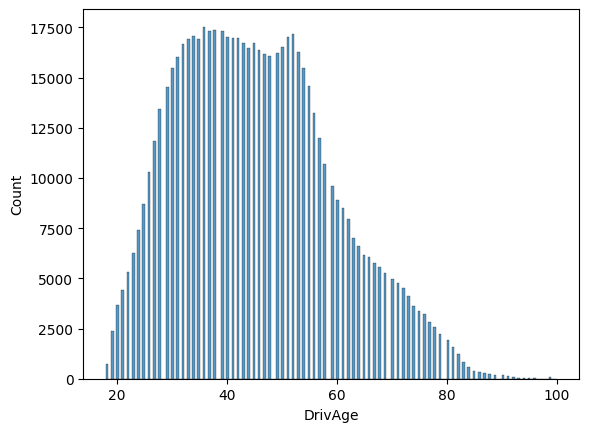

In [52]:
sns.histplot(data.DrivAge)

<Axes: xlabel='DrivAge', ylabel='Count'>

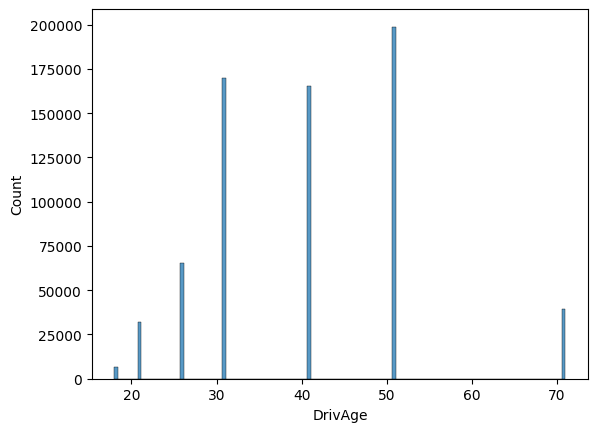

In [53]:
sns.histplot(g)

In [103]:
def create_category_feature(
    features_df: pd.DataFrame,
    column: str,
    intervals: list,
    labels: list = None,
    right: bool = False,
    new_column: str = None
) -> pd.DataFrame:
    # Generowanie etykiet, jeśli nie podano
    if labels is None:
        labels = []
        for i in range(len(intervals) - 1):
            left = intervals[i]
            right_ = intervals[i + 1]
            left_str = "-infty" if left == float("-inf") else str(left)
            right_str = "infty" if right_ == float("inf") else str(right_)
            if right:
                label = f"({left_str},{right_str}]"
            else:
                label = f"[{left_str},{right_str})"
            labels.append(label)
    # Kategoryzacja
    category = pd.cut(features_df[column], bins=intervals, labels=labels, right=right)
    # Zamiana NaN na None
    category = category.where(~category.isna(), None)
    category_df = pd.DataFrame()
    category_df[new_column or f"{column}Category"] = category
    return category_df

In [105]:
age_intervals = [18, 21, 26, 31, 41, 51, 71, float("inf")]
create_category_feature(
    data,
    column="DrivAge",
    intervals=age_intervals,
    right=False,
    new_column="DrivAge" # we replace the original column with the new one
)

,DrivAge
IDpol,
1,"[51,71)"
3,"[51,71)"
5,"[51,71)"
10,"[41,51)"
11,"[41,51)"
...,...
6114326,"[51,71)"
6114327,"[41,51)"
6114328,"[41,51)"


## VehAge

In [54]:
data.VehAge

IDpol
1          0
3          0
5          2
10         0
11         0
          ..
6114326    0
6114327    0
6114328    2
6114329    0
6114330    6
Name: VehAge, Length: 678005, dtype: int64

<Axes: xlabel='VehAge', ylabel='Count'>

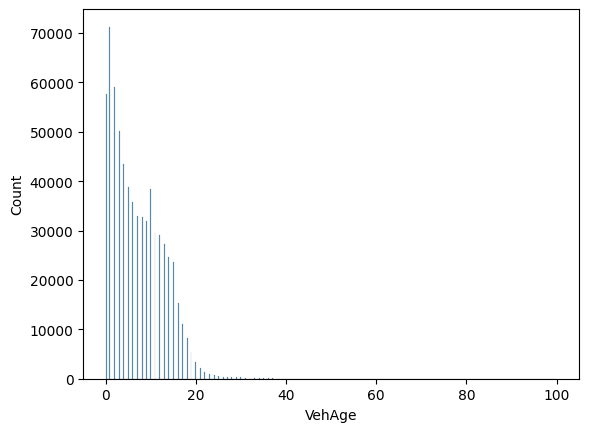

In [55]:
sns.histplot(data.VehAge)

In [56]:
thres = np.array([0,1,10])

In [57]:
g = data.VehAge.apply(lambda age: thres[np.argmax(age < thres) - 1])
g.value_counts()

VehAge
1     396096
10    224170
0      57739
Name: count, dtype: int64

<Axes: xlabel='VehAge', ylabel='Count'>

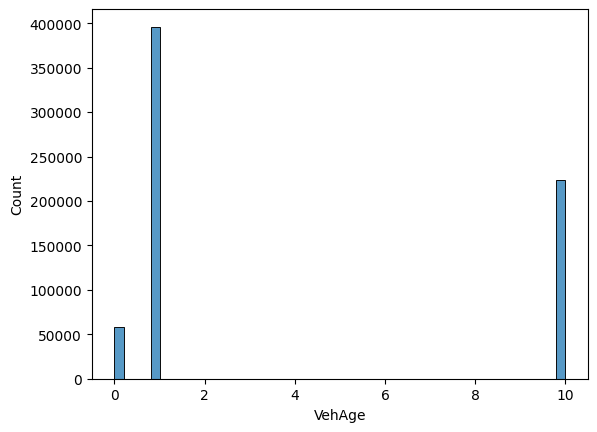

In [58]:
sns.histplot(g)

## VehPower

In [59]:
data.VehPower

IDpol
1          5
3          5
5          6
10         7
11         7
          ..
6114326    4
6114327    4
6114328    6
6114329    4
6114330    7
Name: VehPower, Length: 678005, dtype: int64

<Axes: xlabel='VehPower', ylabel='Count'>

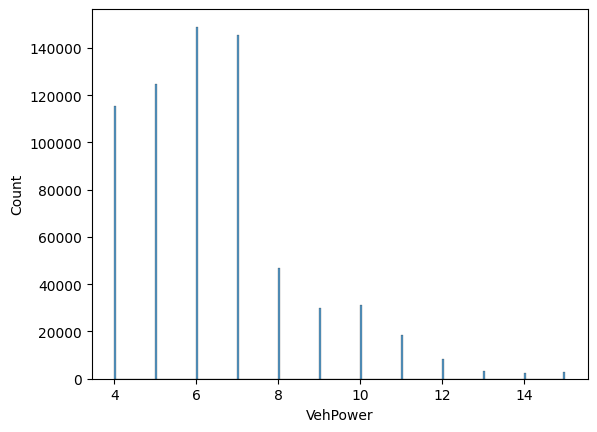

In [60]:
sns.histplot(data.VehPower)

In [61]:
thres = np.arange(0, 10)
thres

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
g = data.VehPower.apply(lambda age: thres[np.argmax(age < thres) - 1])
g.value_counts()

VehPower
6    148976
7    145400
5    124821
4    115342
9     96510
8     46956
Name: count, dtype: int64

<Axes: xlabel='VehPower', ylabel='Count'>

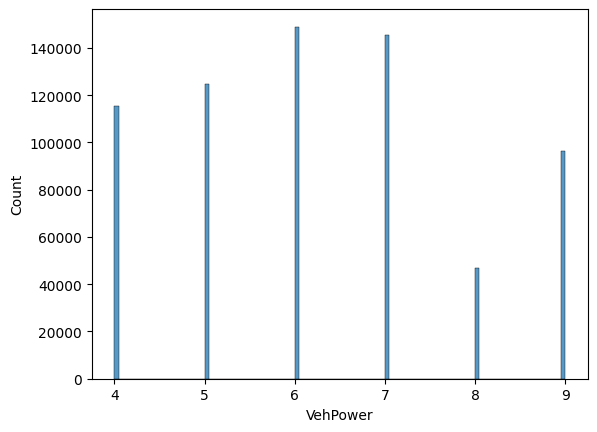

In [65]:
sns.histplot(g)

In [117]:
veh_power_intervals = list(range(4, 10)) + [float("inf")]
c = create_category_feature(
    data,
    column="VehPower",
    intervals=veh_power_intervals,
    right=False,
    new_column="VehPowerCategory"
)
c.value_counts(dropna=False)

VehPowerCategory
[6,7)               148976
[7,8)               145400
[5,6)               124821
[4,5)               115342
[9,infty)            96510
[8,9)                46956
Name: count, dtype: int64

## Density

In [67]:
data.Density

IDpol
1          1217
3          1217
5            54
10           76
11           76
           ... 
6114326    3317
6114327    9850
6114328    1323
6114329      95
6114330      65
Name: Density, Length: 678005, dtype: int64

<Axes: xlabel='Density', ylabel='Count'>

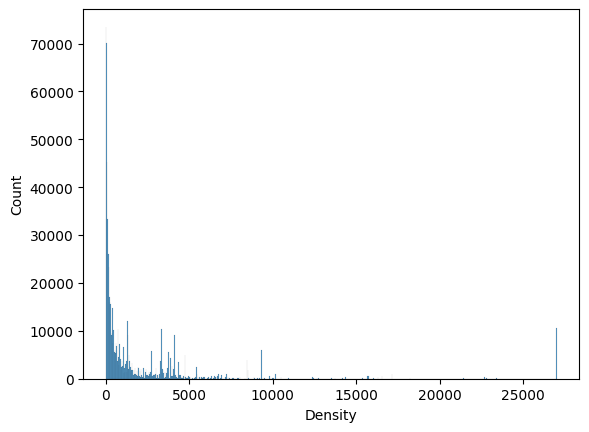

In [68]:
sns.histplot(data.Density)

<Axes: xlabel='Density', ylabel='Count'>

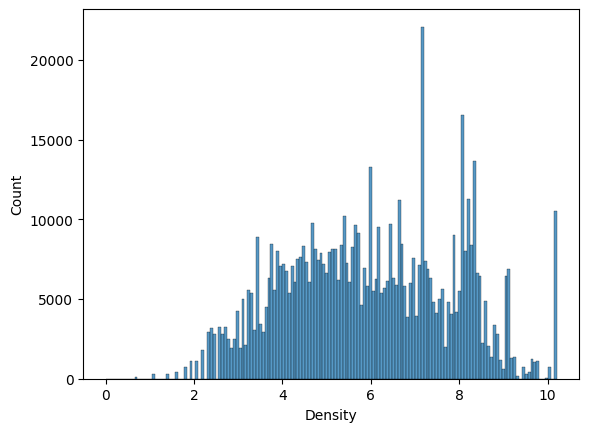

In [69]:
sns.histplot(np.log(data.Density))

## BonusMalus

In [70]:
data.BonusMalus

IDpol
1          50
3          50
5          50
10         50
11         50
           ..
6114326    50
6114327    95
6114328    50
6114329    50
6114330    54
Name: BonusMalus, Length: 678005, dtype: int64

<Axes: xlabel='BonusMalus', ylabel='Count'>

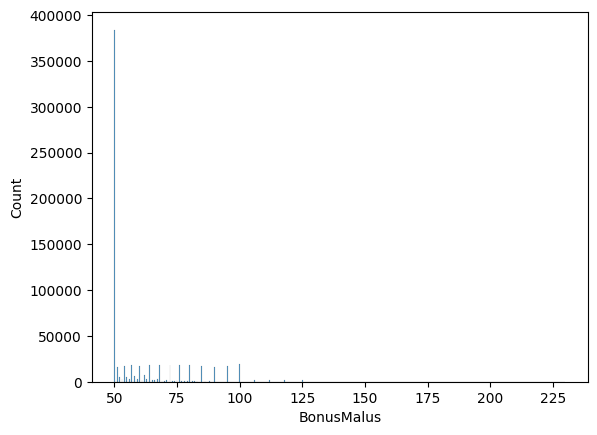

In [71]:
sns.histplot(data.BonusMalus)

In [95]:
data.BonusMalus[data.BonusMalus >= 150].value_counts().sort_index()

BonusMalus
151      1
156    139
158      4
162      2
163      1
165     11
166      2
173      7
174      2
175      3
176      3
177      2
183      6
185      5
187      3
190      3
195      6
196      3
198      2
208      1
218      1
228      1
230      1
Name: count, dtype: int64

In [12]:
data.BonusMalus[data.BonusMalus >= 91].value_counts().sort_index()

BonusMalus
91       186
92       131
93       205
94        43
95     16726
       ...  
198        2
208        1
218        1
228        1
230        1
Name: count, Length: 74, dtype: int64

<Axes: xlabel='BonusMalus', ylabel='Count'>

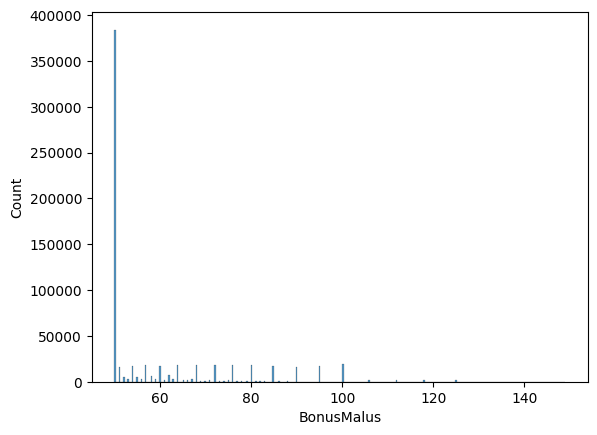

In [96]:
sns.histplot(data.BonusMalus[data.BonusMalus < 150])

In [100]:
c = data.BonusMalus[data.BonusMalus < 150].value_counts()
c[c > 100]

BonusMalus
50     384148
100     19530
68      18791
72      18580
76      18226
64      18192
80      18086
57      17938
60      17363
54      17360
85      16887
95      16726
90      16585
51      15869
62       7180
58       5970
55       5593
52       4770
56       3453
53       3351
63       3169
67       2782
59       2779
71       2056
61       1724
112      1703
106      1670
118      1647
65       1533
125      1418
66       1348
75       1345
70       1113
69       1097
73        985
77        983
74        671
78        641
81        533
83        438
88        318
86        314
82        294
79        253
93        205
91        186
87        182
96        132
92        131
147       121
84        120
140       118
132       113
101       107
97        105
Name: count, dtype: int64

In [101]:
(data.BonusMalus > 50).value_counts()

BonusMalus
False    384148
True     293857
Name: count, dtype: int64

In [120]:
bm = pd.DataFrame({"BonusMalus": data.BonusMalus.clip(upper=150)})
bm

,BonusMalus
IDpol,
1,50
3,50
5,50
10,50
11,50
...,...
6114326,50
6114327,95
6114328,50


In [122]:
bm.value_counts().sort_index()

BonusMalus
50            384148
51             15869
52              4770
53              3351
54             17360
               ...  
144                4
147              121
148               63
149                1
150              209
Name: count, Length: 93, dtype: int64